импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import QuantumTrainer,QuantumNeuralNetwork
import numpy as np

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = QuantumNeuralNetwork( 
    input_size = X_train.shape[1], # window_size*num_features - 1
    output_size = target_window_size,
    hidden_size = 64,
    device = device)

trainer = QuantumTrainer(
    model=model,
    learning_rate=0.001,
    device= device
)

In [4]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=32,
    epochs=400,
    loss_tube=5
)

Epoch 10
Train - Total: 0.416717, Main: 0.416717, Quantum: 0.000000, MAPE: 0.187346, Alpha: 0.602426
Test - MAPE: 0.265677, Tube: 0.140710
Epoch 100
Train - Total: 0.174677, Main: 0.174677, Quantum: 0.000000, MAPE: 0.082264, Alpha: 0.543501
Test - MAPE: 0.041973, Tube: 0.691812
Epoch 200
Train - Total: 0.126815, Main: 0.126815, Quantum: 0.000000, MAPE: 0.056162, Alpha: 0.531656
Test - MAPE: 0.035354, Tube: 0.767821
Epoch 300
Train - Total: 0.114314, Main: 0.114314, Quantum: 0.000000, MAPE: 0.048548, Alpha: 0.528545
Test - MAPE: 0.033352, Tube: 0.791154
Epoch 400
Train - Total: 0.108994, Main: 0.108994, Quantum: 0.000000, MAPE: 0.046141, Alpha: 0.527219
Test - MAPE: 0.030810, Tube: 0.792299


In [5]:
model.training = False
model.load_state_dict(torch.load('best_model_weights.pth'))

<All keys matched successfully>

In [6]:
LV = LossVisualizer(history)

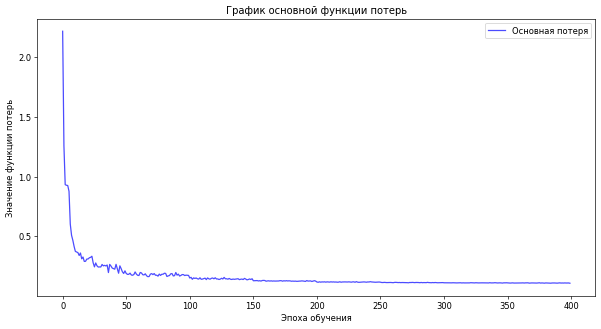

In [7]:
LV.show_training_loss()

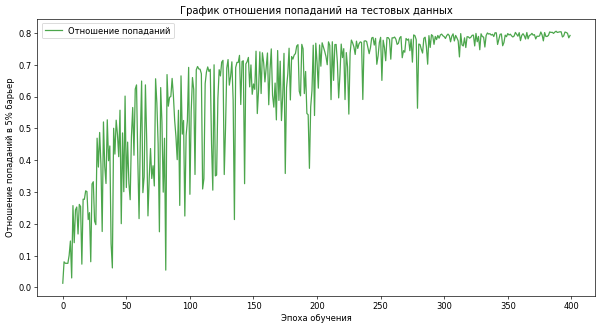

In [8]:
LV.show_test_tube()

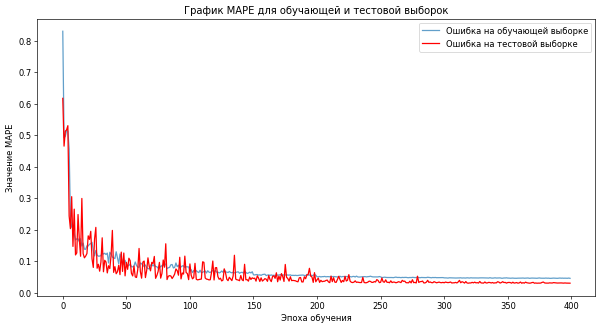

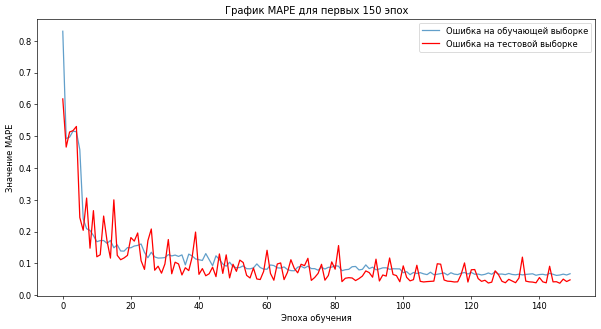

In [9]:
LV.show_mape()

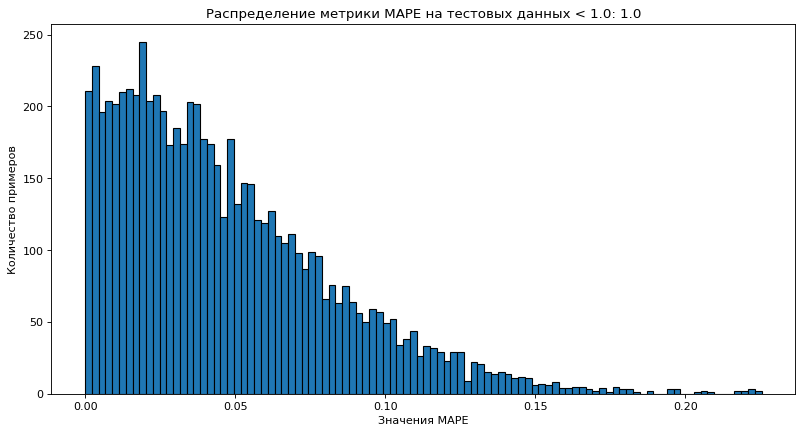

Процент значений MAPE < 1.0: 1.0


In [13]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 100)

Количество записей: 5334


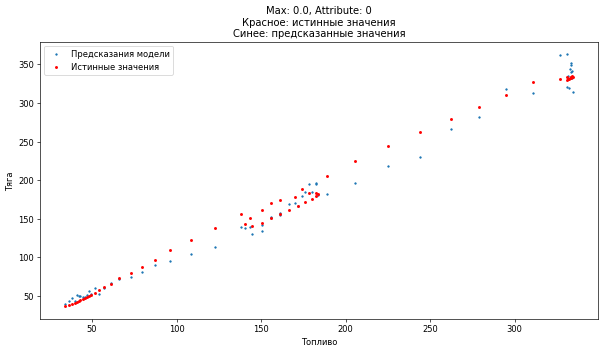

Количество записей: 5334


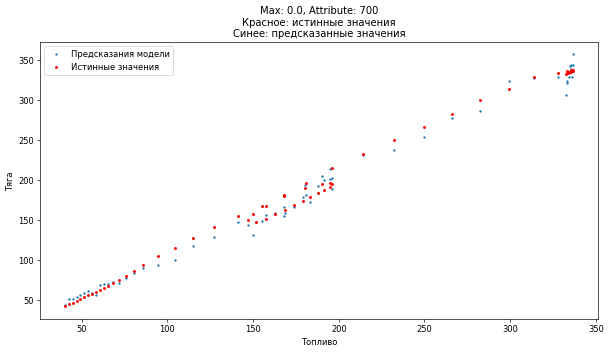

Количество записей: 5334


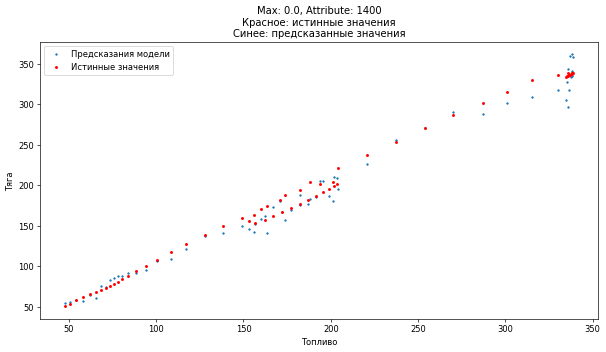

Количество записей: 5334


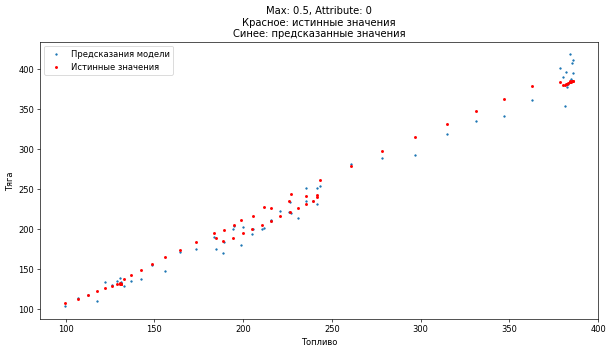

Количество записей: 5334


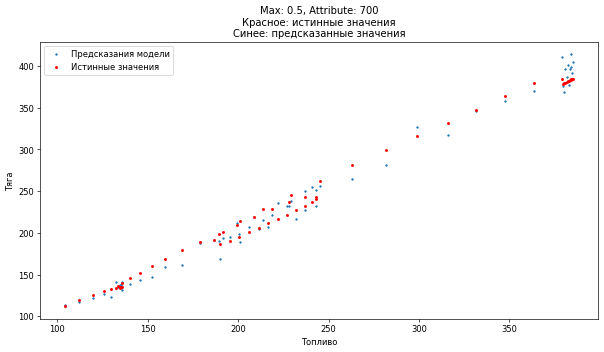

Количество записей: 5334


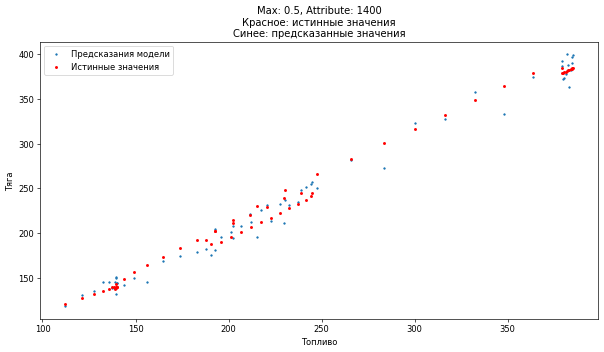

Количество записей: 5334


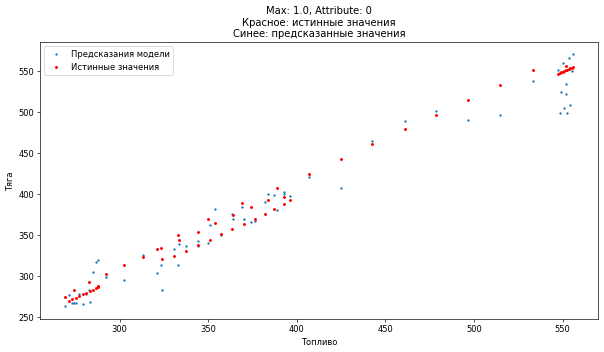

Количество записей: 5334


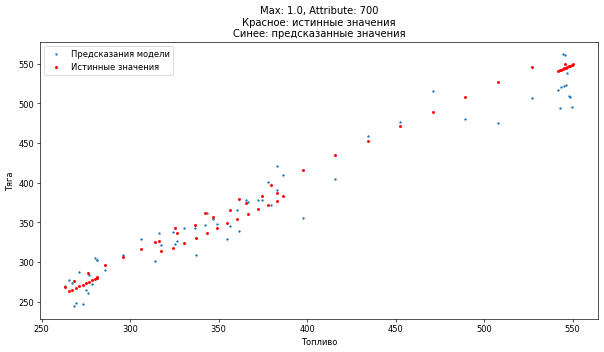

Количество записей: 5334


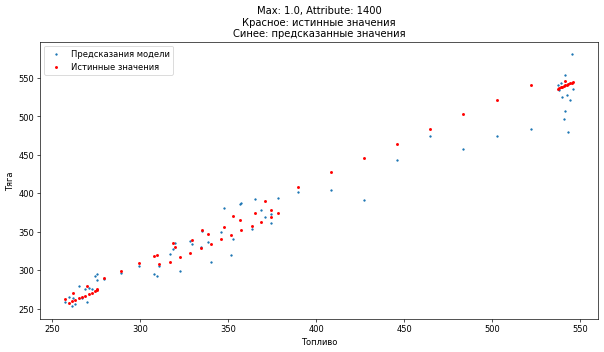

In [12]:
LV.show_predictions(model,df,pd_params,device)